<h1 style="color:blue"> Bayesian Statistics and Probabilistic Programming</h1>

<h1 style="color:blue"> Spring 2021 - Homework 02</h1>

<h3 style="color:blue">2021-05-31</h3>

<h3 style="color:blue"> Authors: David Farré Gil, Blai Ras Jimenez, Irene Bonafonte Pardàs </h3>

***
###### LaTeX macros
$\def\prob{P}$
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\borel{\operatorname{Borel}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\R{\mathbb{R}}$ 
$\def\N{\mathbb{N}}$
$\def\Z{\mathbb{Z}}$
$\def\Ee{\operatorname{E}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\binomdist{\operatorname{Binom}}$
$\def\berndist{\operatorname{Ber}}$
$\def\betabinomdist{\operatorname{Beta-Binom}}$
$\def\betadist{\operatorname{Beta}}$
$\def\expdist{\operatorname{Exp}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinom}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\normaldist{\operatorname{N}}$
$\def\unifdist{\operatorname{Unif}}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
***

## Data Reading

In [1]:
data <- read.csv("aug_train.csv")
test <- read.csv("aug_test.csv")

In [2]:
test_response <- read.csv("Test_Response.csv")

In [3]:
test$Response <- test_response$Response

## Data Analysis

### Variables

01. `id`:        id of the subject.   
02. `Gender`:        Sex of the subject.
03. `Age`:         Age of the subject.
04. `Driving License`:      Whether if the subject has or not a driver's license.
05. `Region_Code`:          Coded region name.
06. `Previously_Insured`:      Whether if the subject has already a health insurance.
07. `Vehicle_Age`:  Number of years of the subject's car.
08. `Vehicle_Damage`:   Measure of detriment of the subject's car.
09. `Annual_Premium`:          Number of citations in total.
10. `Policy_Sales_Channel`:      Sum of money that the subject needs to pay regularly to an insurance company.
11. `Vintage`:     Days the subject is insured until now.
12. `Response`: Whether the subject said yes or no to getting a vehicle insurance.

As we can see, we will get rid of the variables `id`, `Region_Code` and `Policy_Sales_Channel` since they do not bring any substantial information towards the goal of predicting whether a customer would be interested in Vehicle Insurance. Even if they did, they should not be used towards that goal, it may even be a case of spurious correlation.

In [4]:
data <- data[c("Gender","Age","Driving_License","Previously_Insured","Vehicle_Age","Vehicle_Damage","Annual_Premium","Vintage","Response")]

In [5]:
str(data)

'data.frame':	382154 obs. of  9 variables:
 $ Gender            : chr  "Male" "Male" "Female" "Female" ...
 $ Age               : int  22 42 66 22 28 25 51 38 45 42 ...
 $ Driving_License   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Previously_Insured: int  1 0 0 0 1 1 0 1 0 0 ...
 $ Vehicle_Age       : chr  "< 1 Year" "1-2 Year" "1-2 Year" "< 1 Year" ...
 $ Vehicle_Damage    : chr  "No" "Yes" "Yes" "No" ...
 $ Annual_Premium    : num  2630 43327 35841 27645 29023 ...
 $ Vintage           : int  16 135 253 69 211 23 209 51 262 217 ...
 $ Response          : int  0 0 0 0 0 0 0 0 0 1 ...


As we can see, there's a few categorical columns. For the sake of the model creation and training, we will convert them to numerical, e.g. ``Female`` is coded to ``1`` and ``Male`` is coded to  ``0``, thanks to the ``preprocess`` function below.

In [6]:
preprocess <- function(data) {
    data$Vehicle_Age <- as.numeric(factor(data$Vehicle_Age, levels=c('< 1 Year','1-2 Year','> 2 Years')))
    data$Vehicle_Damage <- as.numeric(factor(data$Vehicle_Damage, levels=c('No','Yes'))) 
    data$Gender <- as.numeric(factor(data$Gender))
    return(data)
}

In [7]:
data <- preprocess(data)
test <- preprocess(test)

In [8]:
data[1:5,]

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,2,22,1,1,1,1,2630,16,0
2,2,42,1,0,2,2,43327,135,0
3,1,66,1,0,2,2,35841,253,0
4,1,22,1,0,1,1,27645,69,0
5,2,28,1,1,1,1,29023,211,0


Let's check the distribution of each variable in the data set:

[1] "Gender"
[1] "Age"


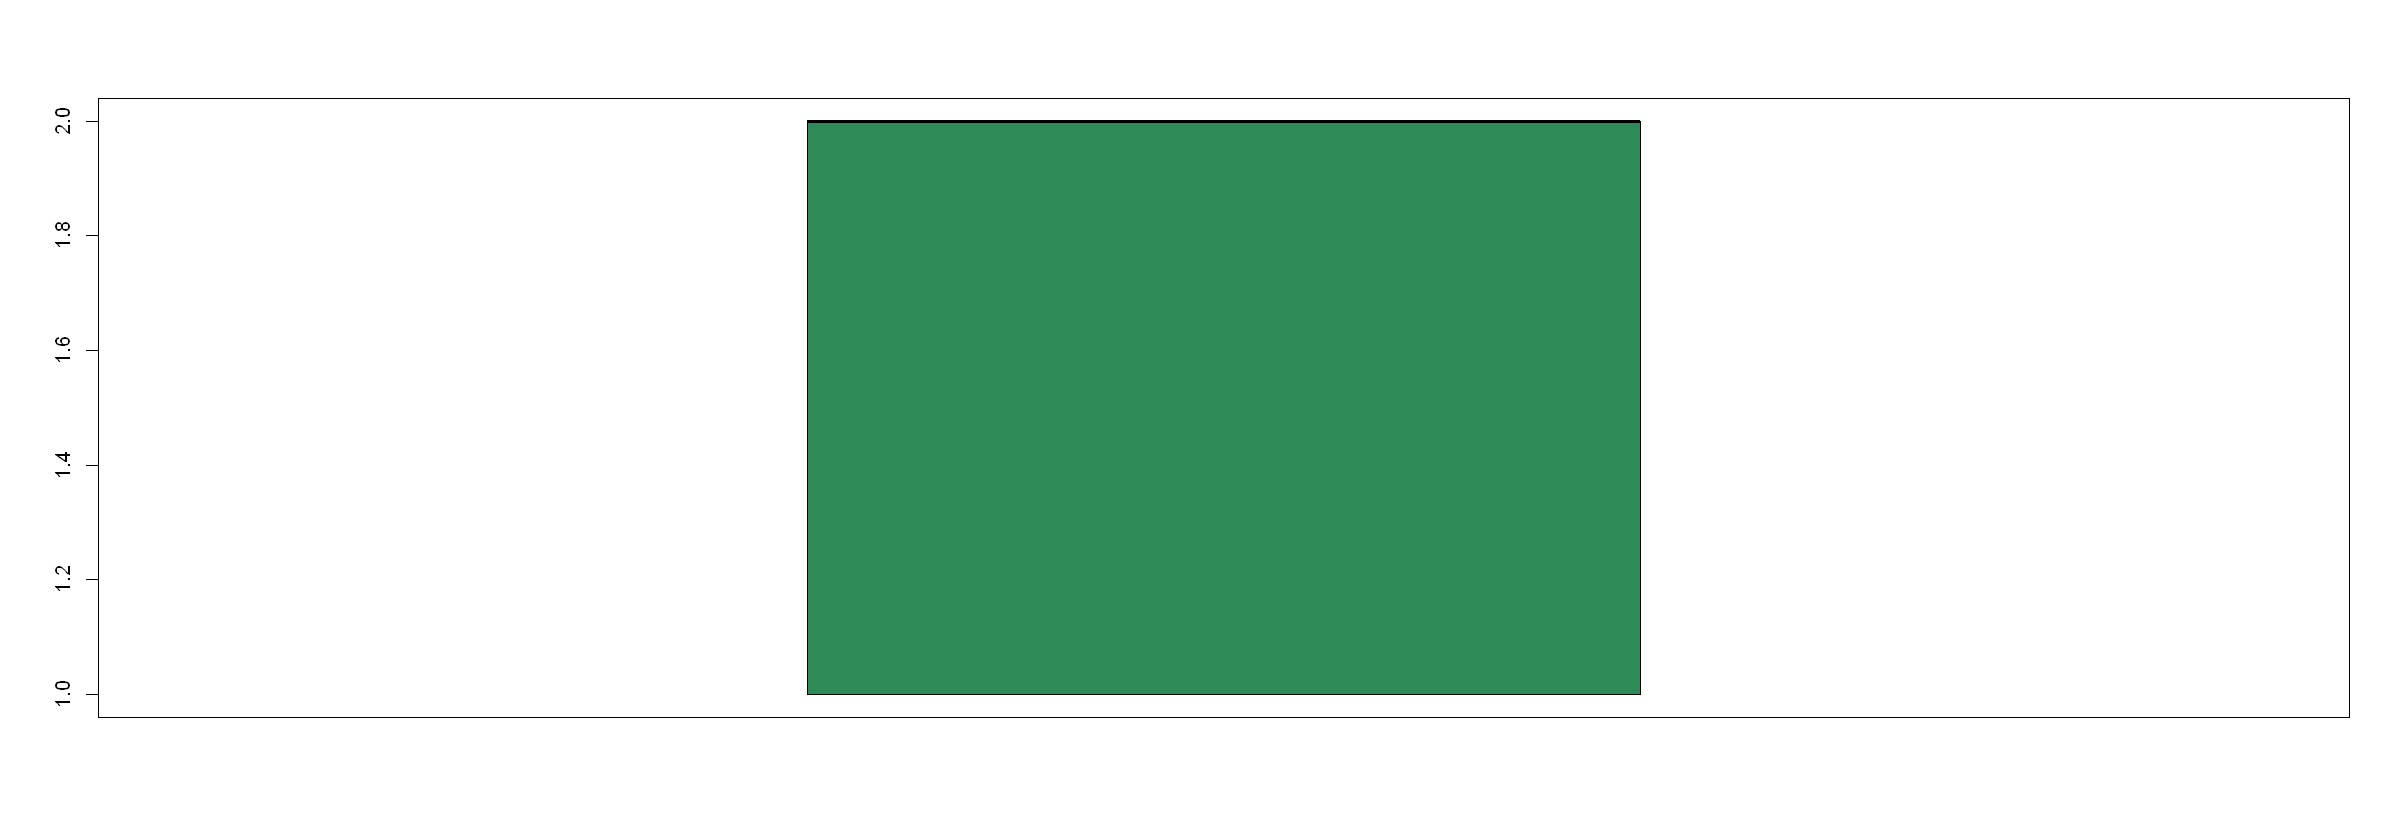

[1] "Driving_License"


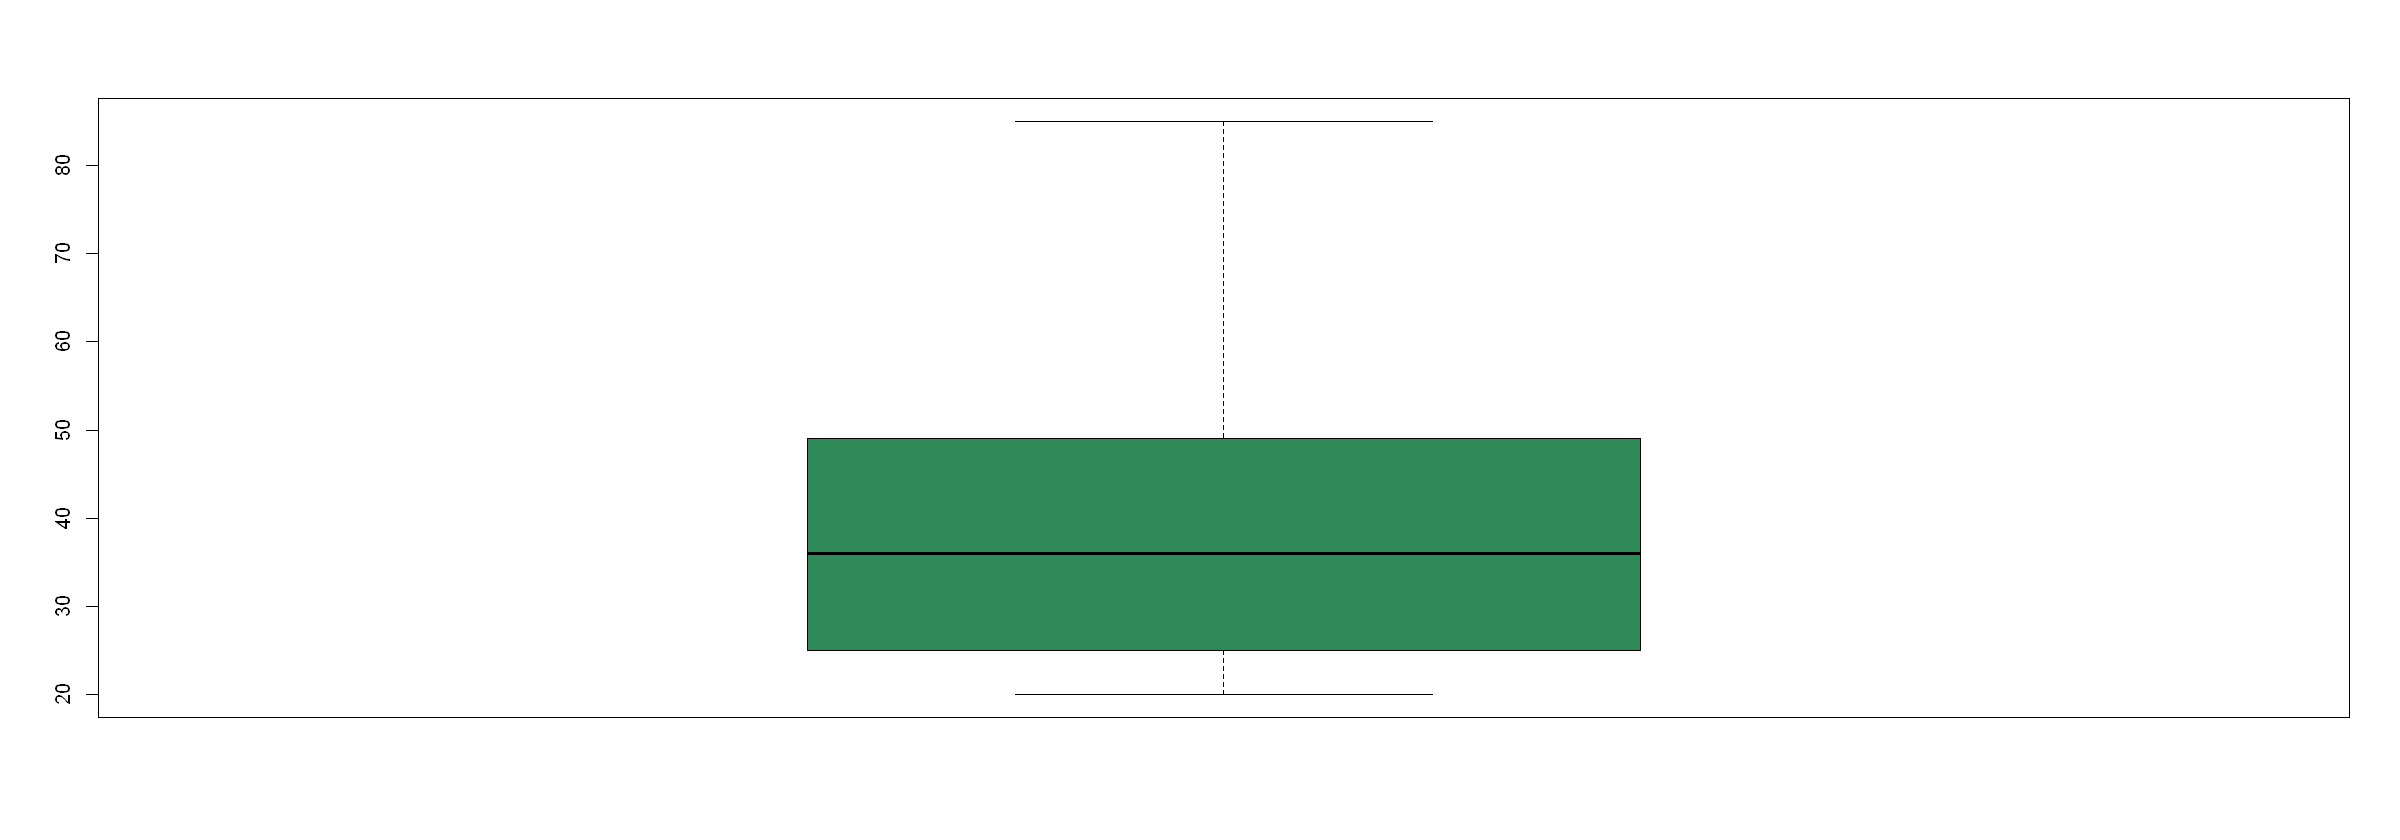

[1] "Previously_Insured"


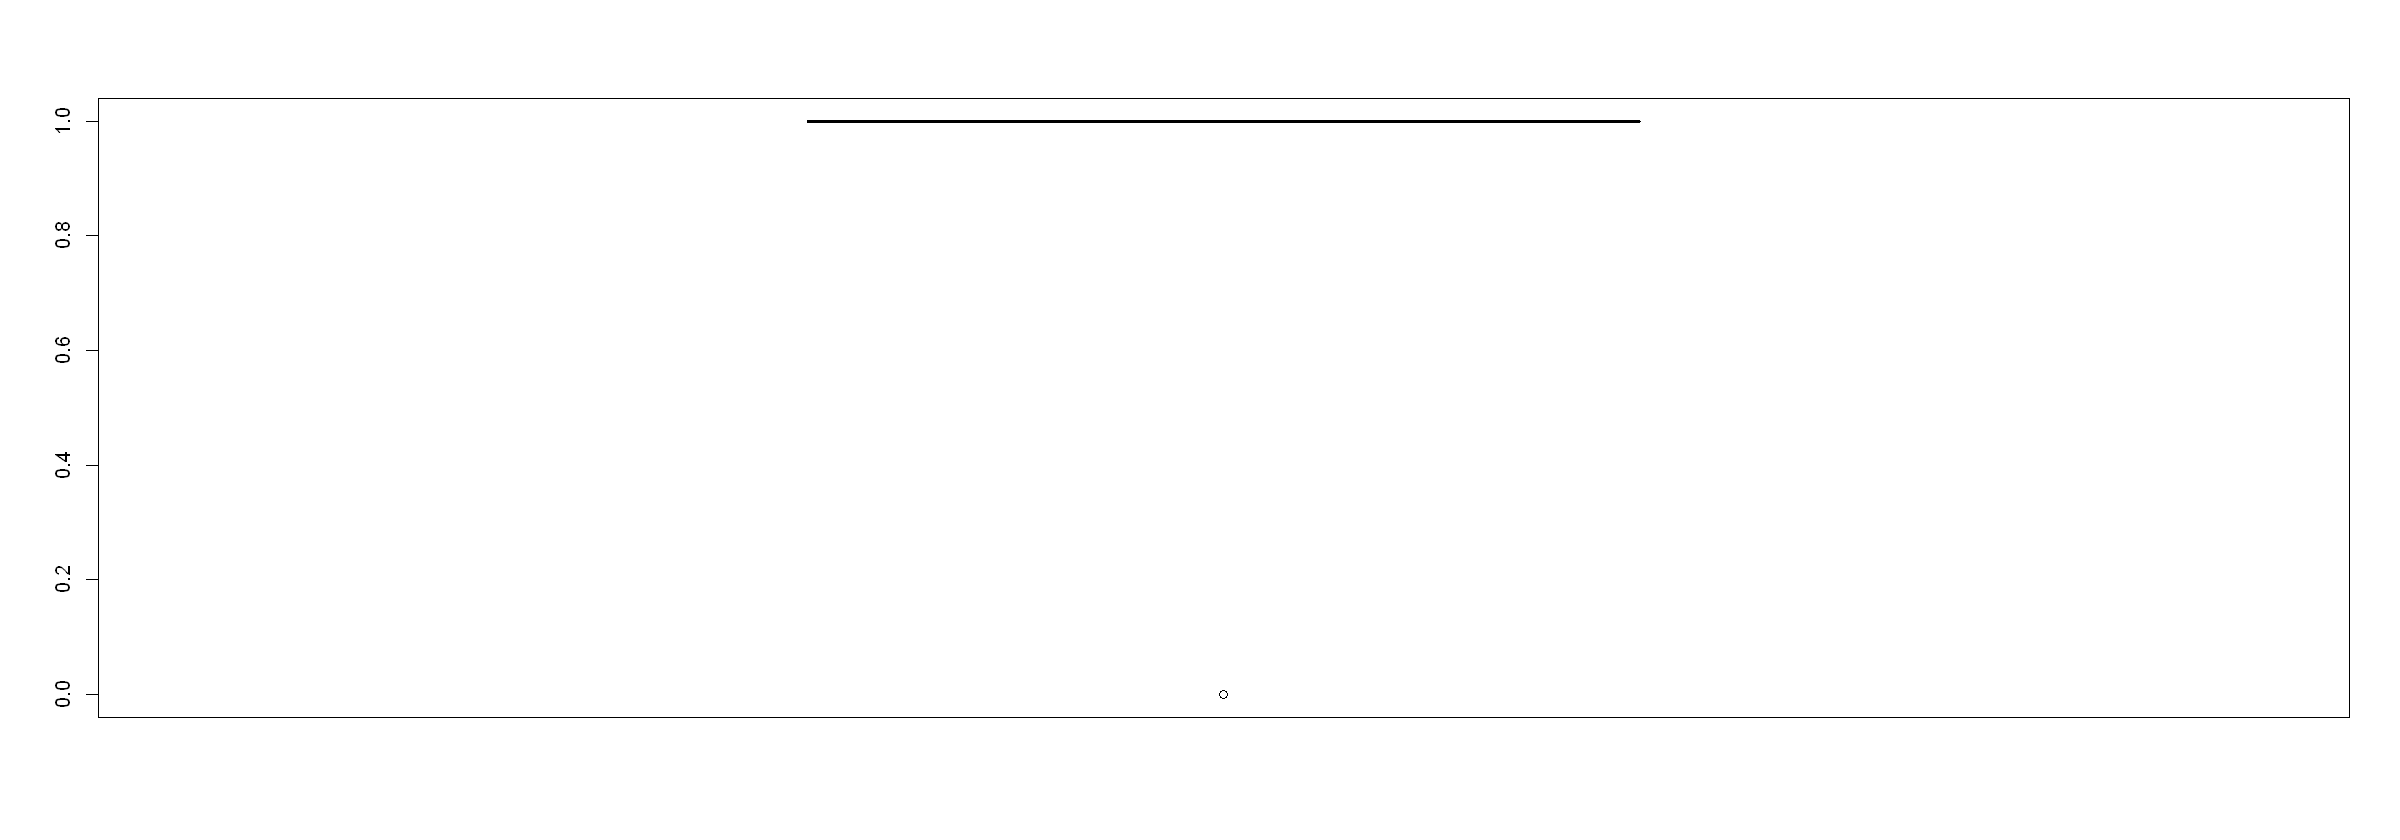

[1] "Vehicle_Age"


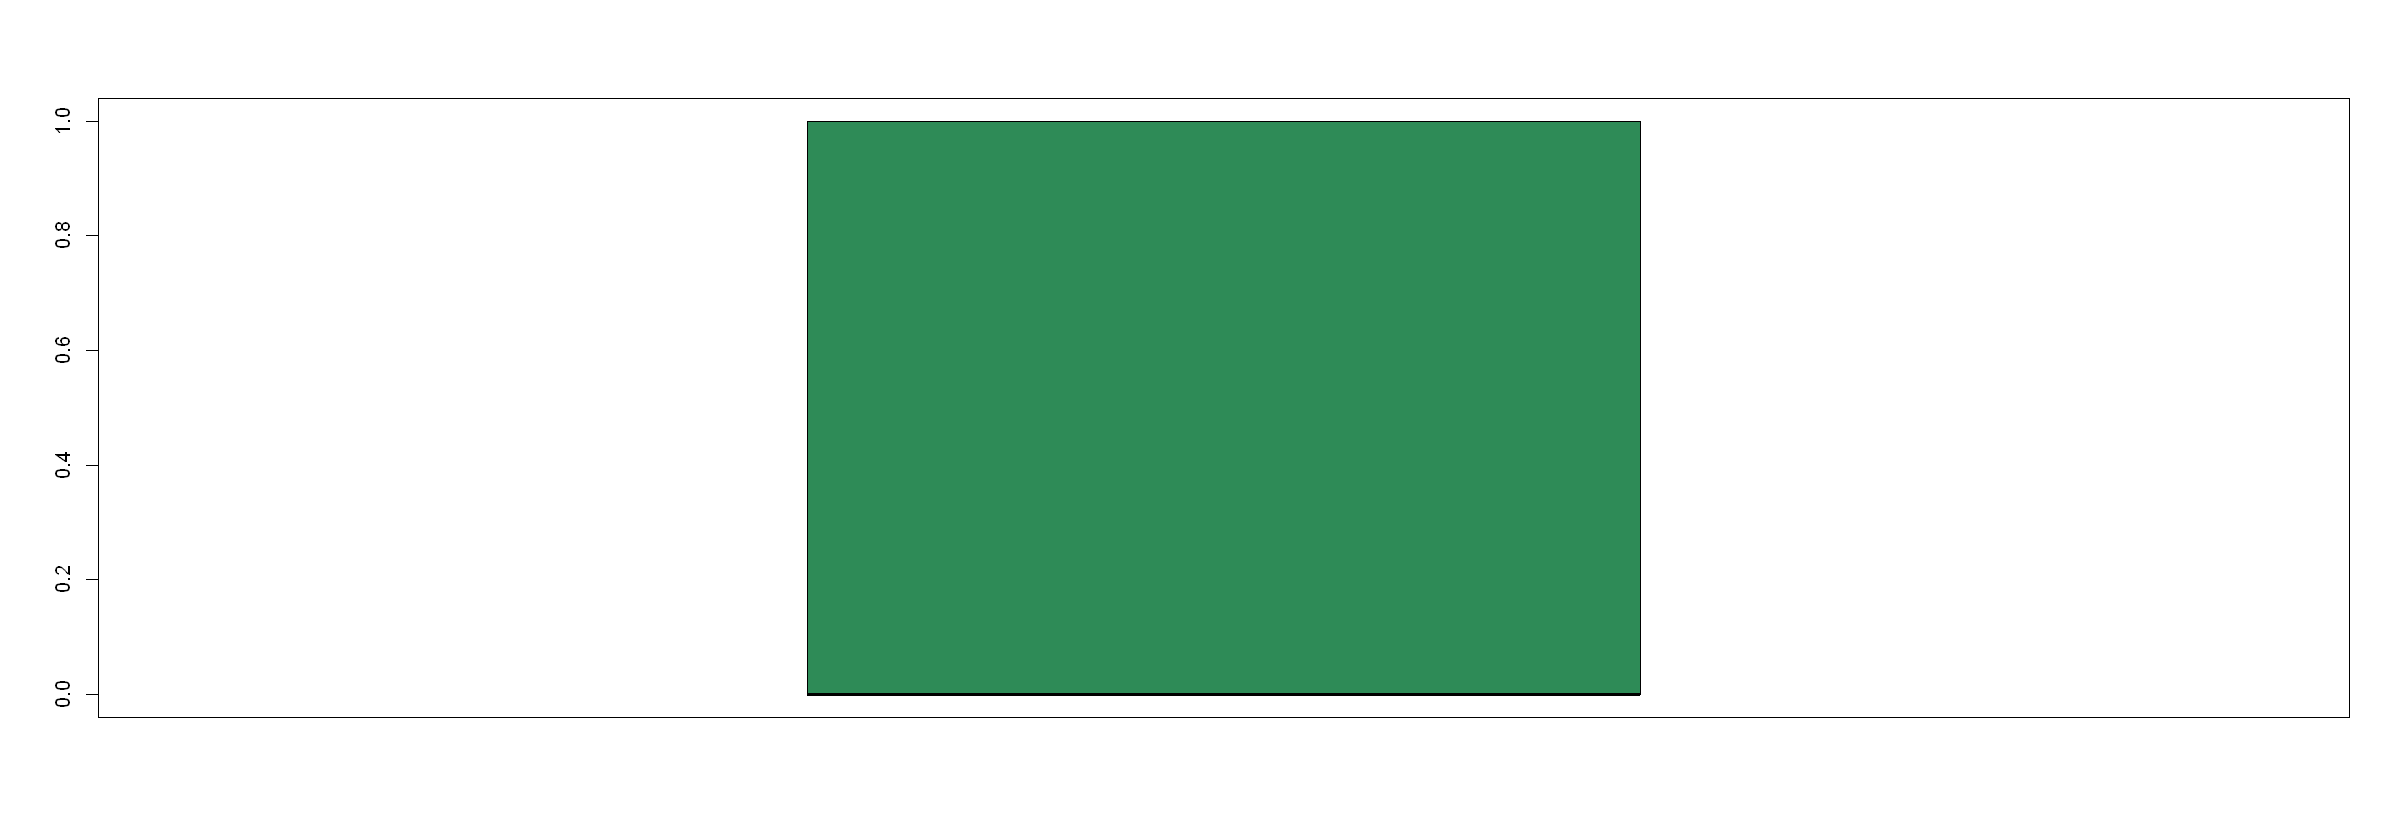

[1] "Vehicle_Damage"


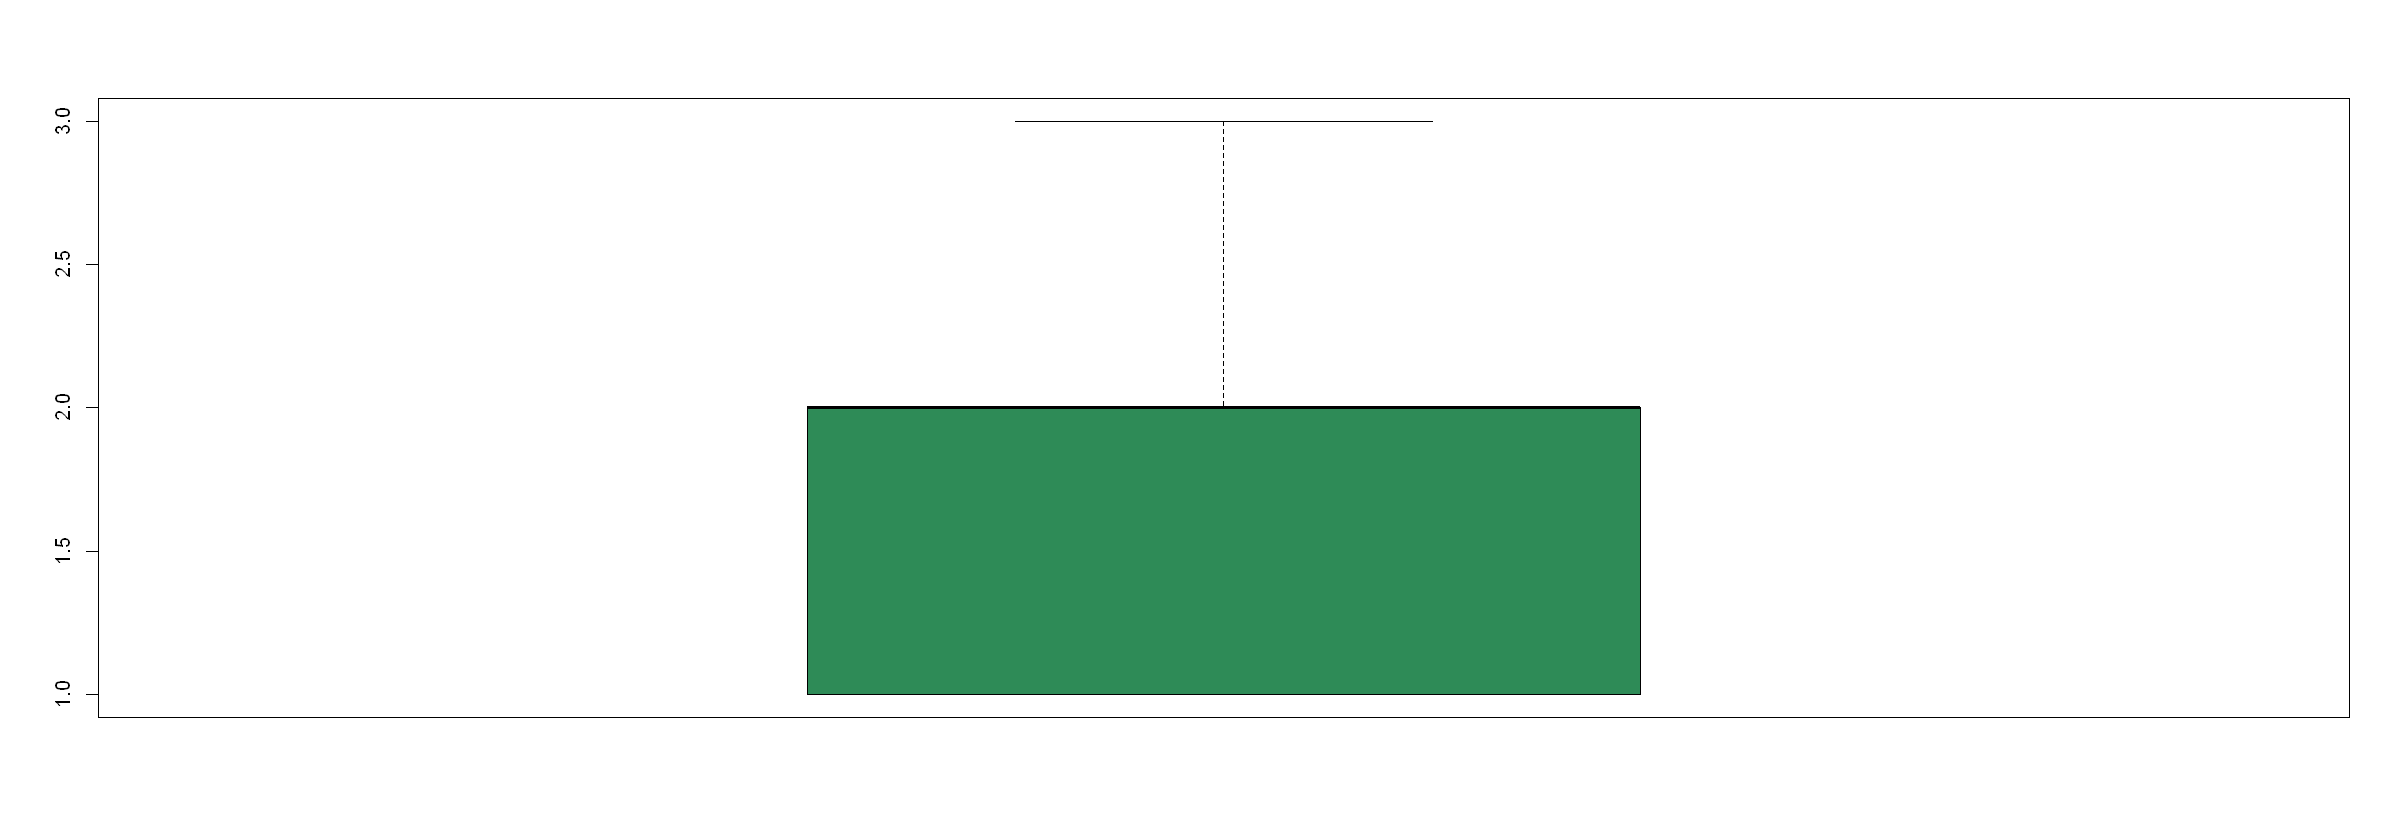

[1] "Annual_Premium"


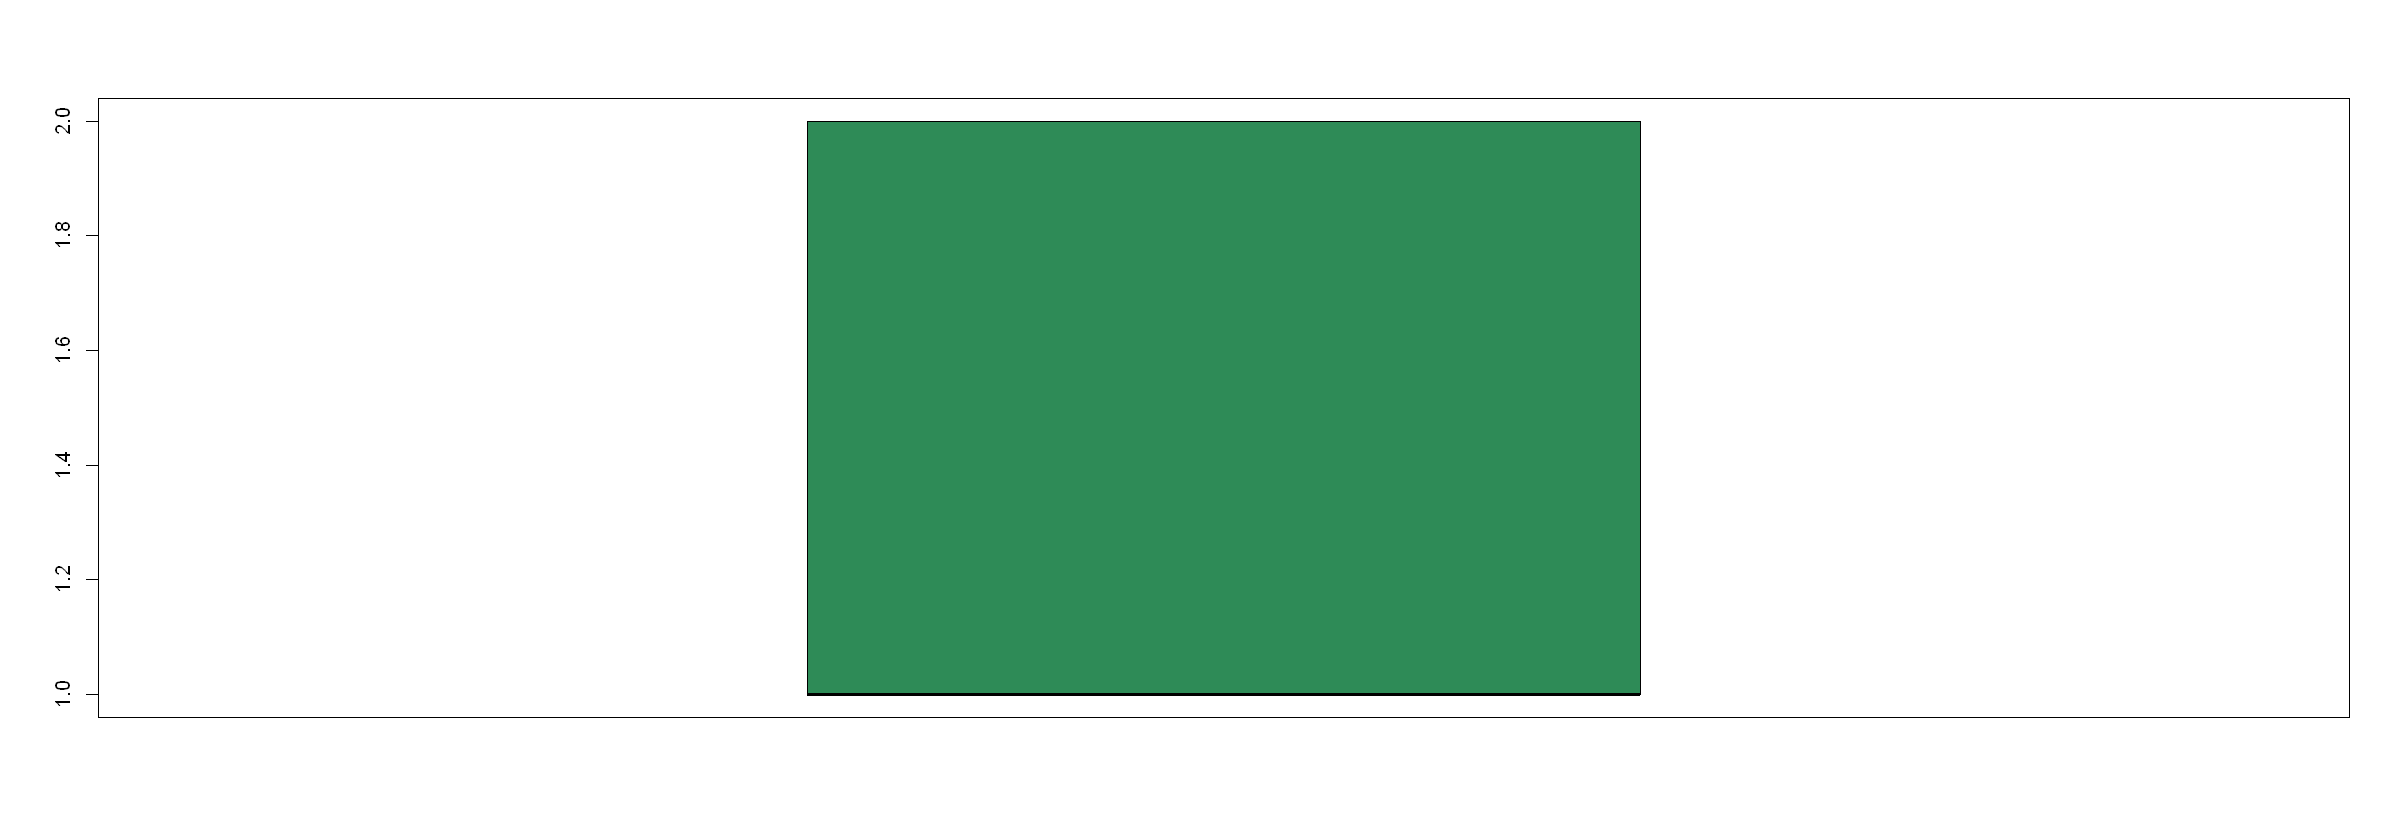

[1] "Vintage"


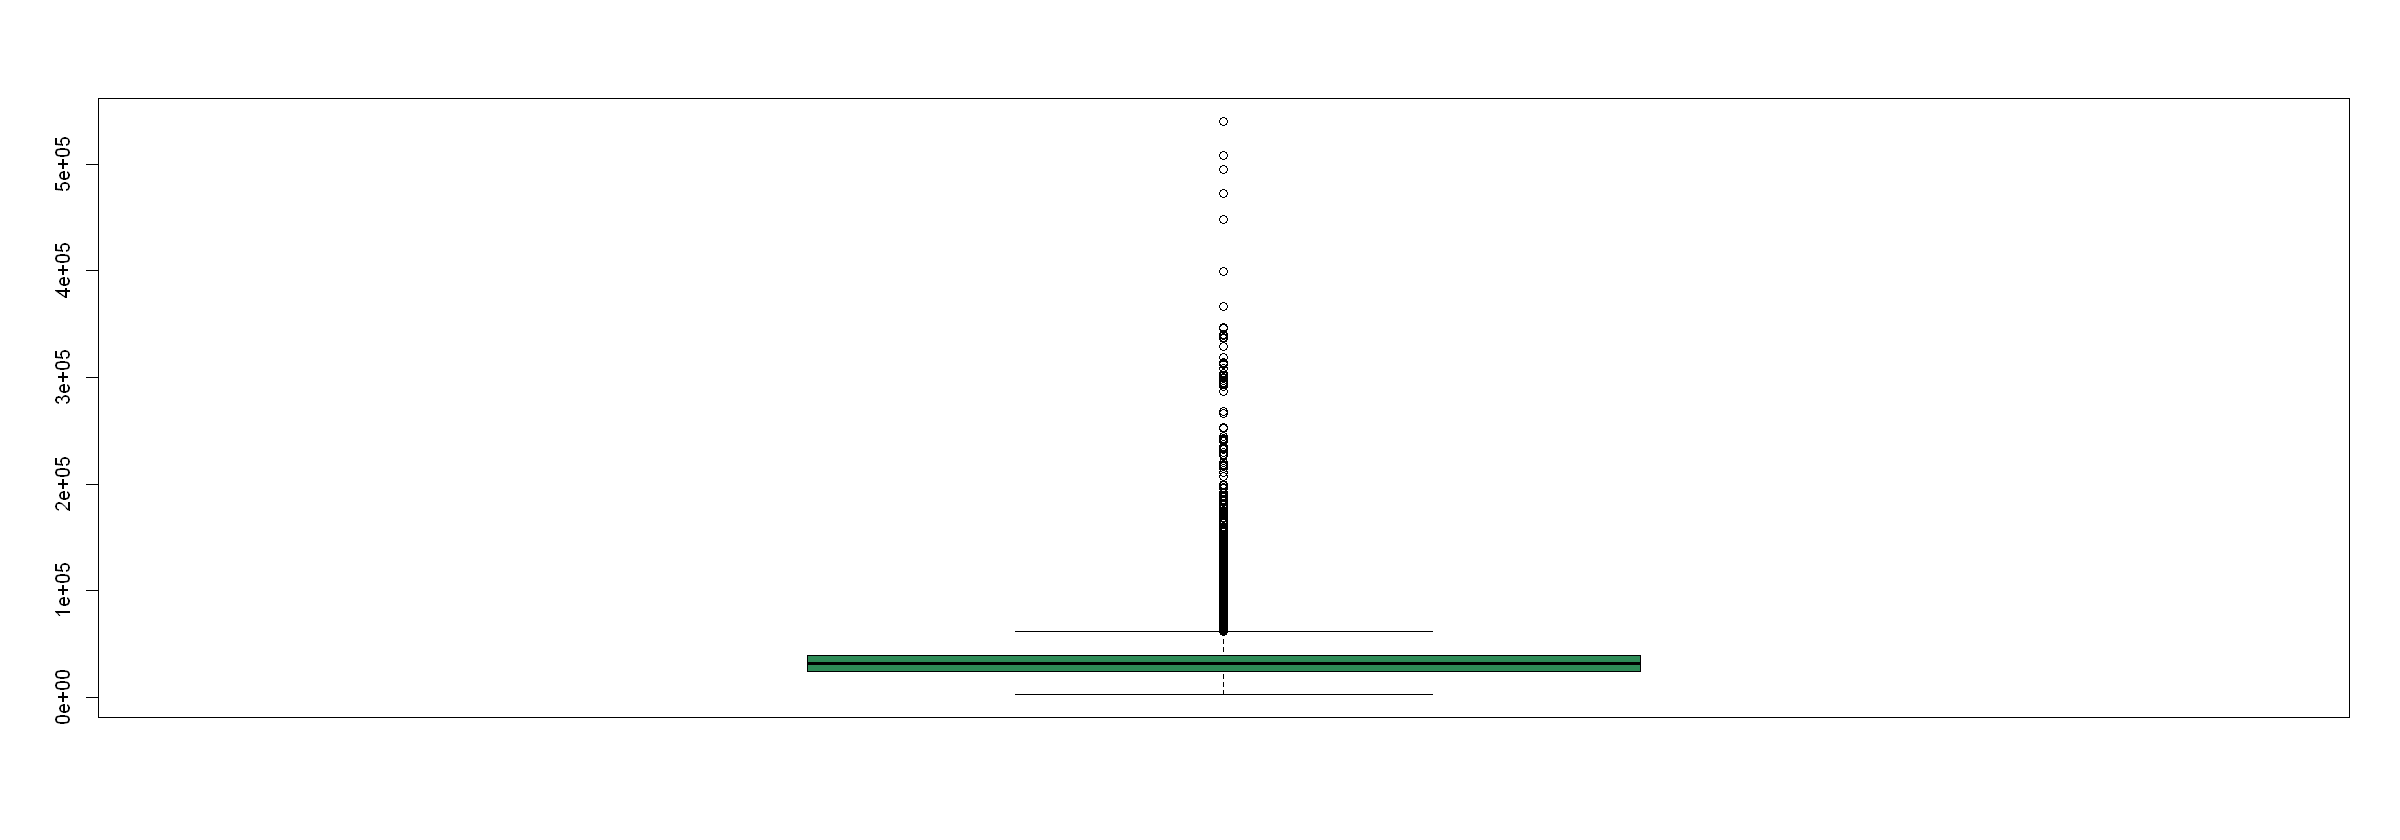

[1] "Response"


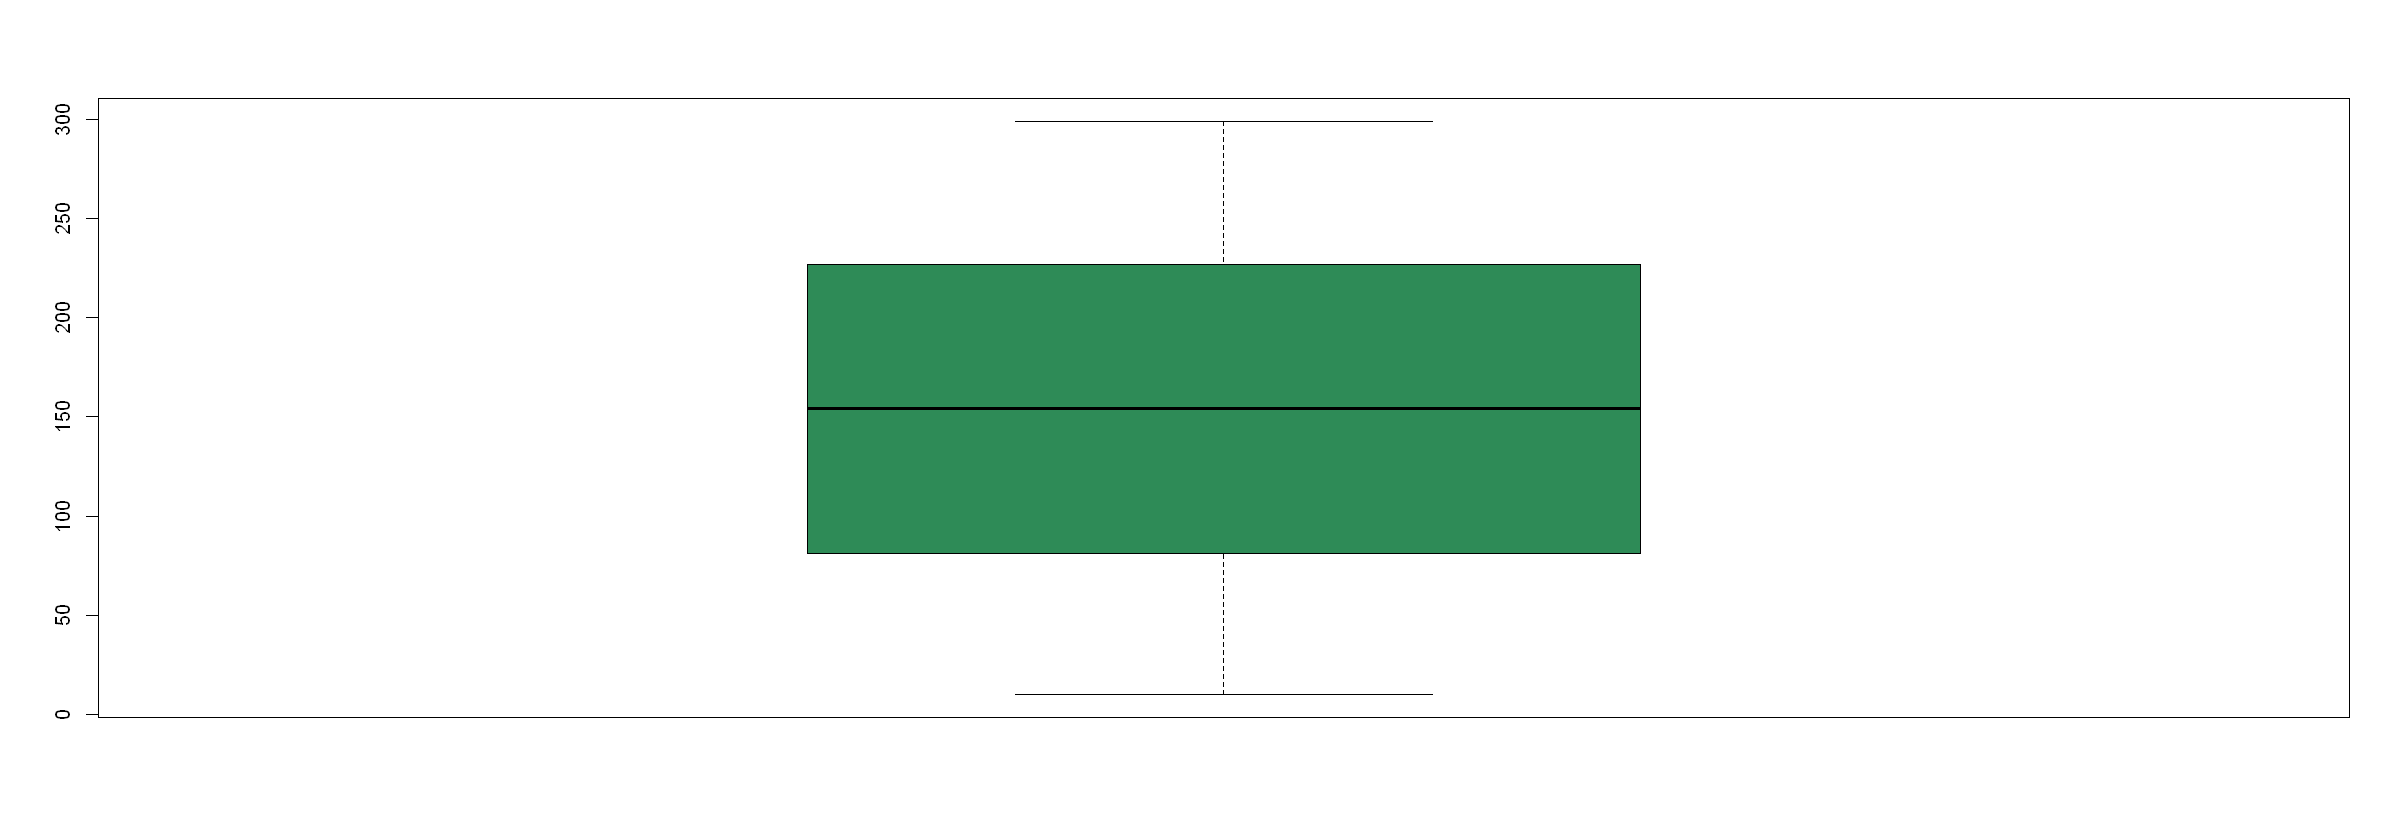

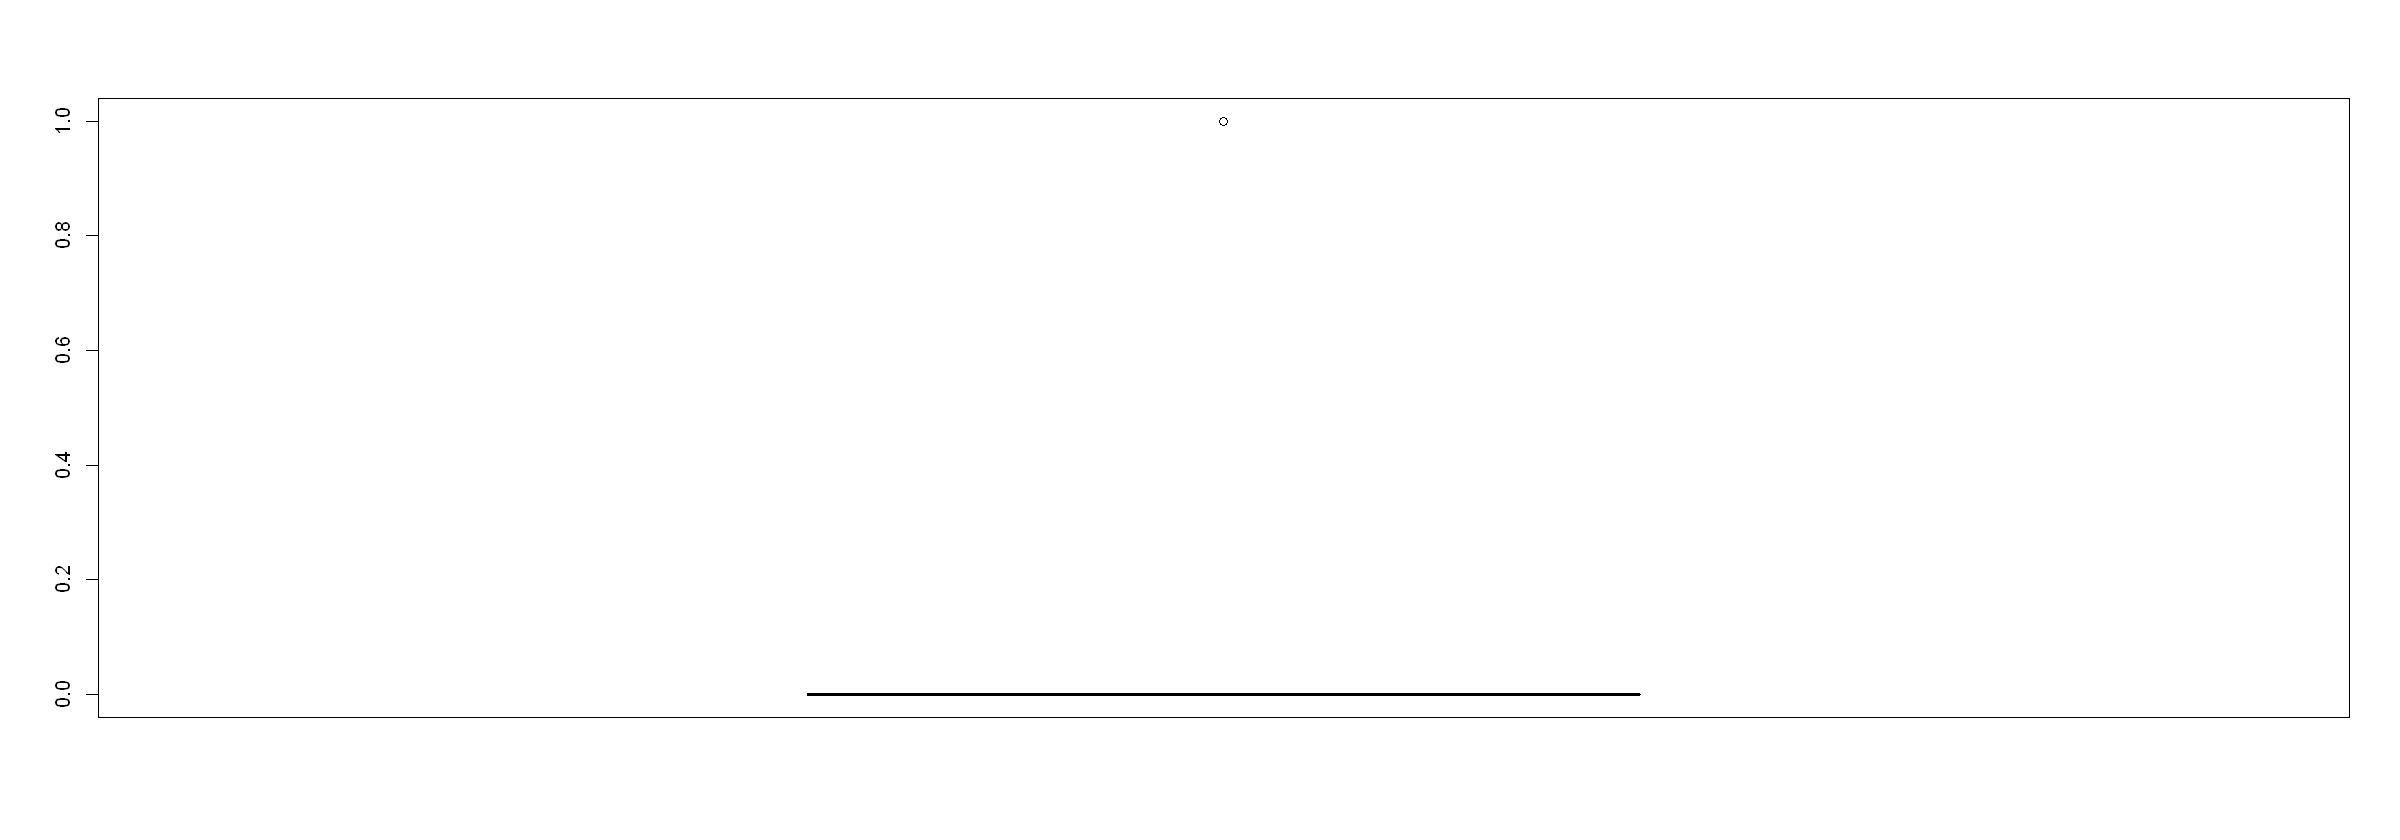

In [9]:
options(repr.plot.width=20,repr.plot.height=7)
for (i in 1:ncol(data)) {
    print(colnames(data)[i])
    boxplot(data[,i],col="seagreen")
    
}

And now, the possible correlation that might occurr betwen this variables.

We can see that ``Age`` is highly correlated with ``Vehicle_age``, an understandable relationship since both variables count years and frequently, a person's age matches his car's age.

Denote also the negative correlation between ``Previously_Insured`` and ``Vehicle_Damage``. [DISCUTIR]



In [10]:
round(cor(data),2)

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
Gender,1.00,0.15,-0.02,-0.09,0.16,0.10,0.00,0,0.07
Age,0.15,1.00,-0.08,-0.26,0.76,0.27,0.07,0,0.13
Driving_License,-0.02,-0.08,1.00,0.01,-0.03,-0.01,-0.01,0,0.01
Previously_Insured,-0.09,-0.26,0.01,1.00,-0.42,-0.85,0.00,0,-0.43
Vehicle_Age,0.16,0.76,-0.03,-0.42,1.00,0.43,0.04,0,0.29
Vehicle_Damage,0.10,0.27,-0.01,-0.85,0.43,1.00,0.01,0,0.45
Annual_Premium,0.00,0.07,-0.01,0.00,0.04,0.01,1.00,0,0.03
Vintage,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0.00
Response,0.07,0.13,0.01,-0.43,0.29,0.45,0.03,0,1.00


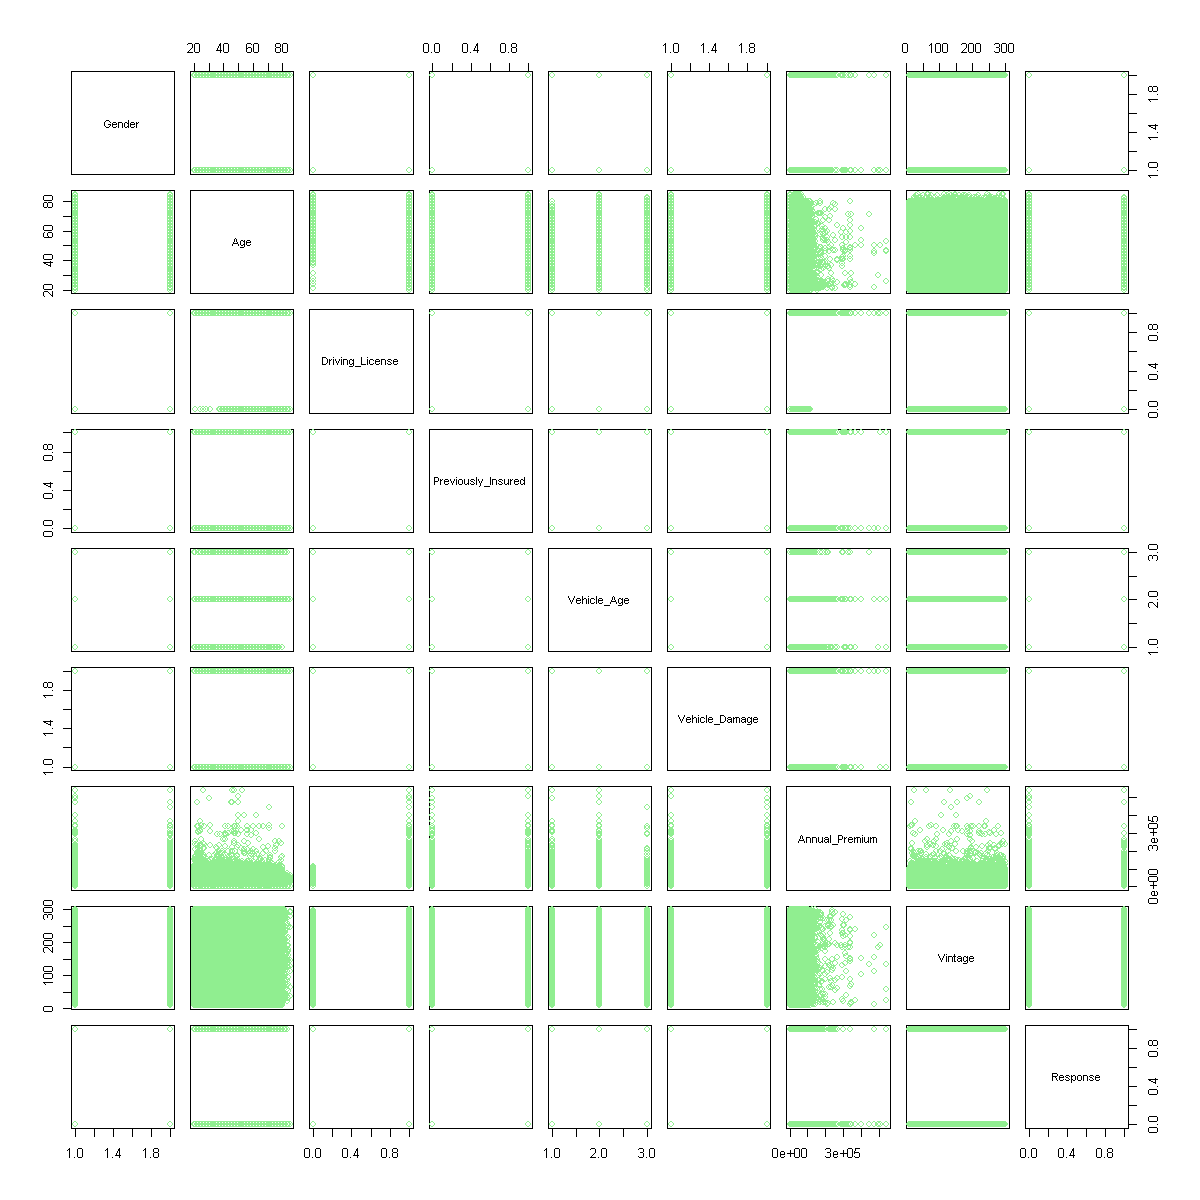

In [73]:
#16 min, do not load!!!


# options(repr.plot.width=10,repr.plot.height=10)
# pairs(data,col="seagreen")

Do we have to deal with null values in the dataset? No.

In [11]:
sum(is.na(data))
sum(is.na(test))

[1] 0

[1] 0

Let's look at this class imbalance we've been told:

In [12]:
table(data$Response)


     0      1 
319553  62601 

In [13]:
round(table(data$Response)/nrow(data)*100,2)


    0     1 
83.62 16.38 

Huge! Our first approach to deal with this problem is resampling with the function ``resample`` that we have below. It takes as parameter the amount of samples we want from each class and returns the filtered dataframe. 

In [9]:
resample <- function(data,size) {
    total = size * 2
    if (total > nrow(data)) {
        cat("Not enough data to create a dataframe of size ",total)
        return(data)
    } else if (size > 62601) {
        print("Not enough samples!")
        return(data)
    }
    negative <- sample(x=which(data$Response == 0), size=size, replace=FALSE)
    positive <- sample(x=which(data$Response == 1), size=size, replace=FALSE)
    resampled_idx <- c(negative, positive)
    return(data[resampled_idx, ])
}

In [12]:
df <- resample(data,1000)
dim(df)
table(df$Response)

[1] 2000    9


   0    1 
1000 1000 

A common practice in Machine Learning is perform feature scaling, which helps most models to converge more quickly towards the minima. We can perform this method with the function ``scale``:

In [13]:
response <- df$Response
df <- df[,-(9:9),drop=FALSE]
df <- as.data.frame(scale(df))
df <- cbind(df, Response = response)
df[1:5,]

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
256880,-1.1808946,-1.2932671,0.03163069,1.5681127,-1.3731678,-1.4640976,-0.2556571,0.5658137,0
191324,0.8463922,0.4553757,0.03163069,1.5681127,0.3986616,-1.4640976,-0.3744550,-0.9413322,0
107184,0.8463922,1.1839769,0.03163069,-0.6373904,0.3986616,0.6826731,-0.2775245,1.5705776,0
230385,0.8463922,-0.2732254,0.03163069,1.5681127,0.3986616,0.6826731,-0.1200347,1.0442727,0
244476,0.8463922,-1.2204070,0.03163069,1.5681127,-1.3731678,-1.4640976,-0.5433694,1.2356563,0


## Model creation

Below we can observe each model creation. We've decided to use ``rstanarm``, ``rstan``. ``JAGS`` and ``MCMCpack``.

## RStan

For RStan and JAGS we need to combine all variables into a list and state also the number of rows of our dataset. 

In [31]:
dfCombined <- as.list(df[, c('Gender','Age','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage',
                             'Annual_Premium','Vintage','Response')])
dfCombined$nrows <- nrow(df)

In [28]:
stan <- paste(" 
data {
    int<lower=0> nrows; //Number of data items
    int<lower=0,upper=1> Response[nrows]; //Outcome vector
    //Predictors
    vector[nrows] Gender;
    vector[nrows] Age;
    vector[nrows] Driving_License;
    vector[nrows] Previously_Insured;
    vector[nrows] Vehicle_Age;
    vector[nrows] Vehicle_Damage;
    vector[nrows] Annual_Premium;
    vector[nrows] Vintage;

}
parameters {
  vector[9] b; //Coefficients for predictors
}
model {
  Response ~ bernoulli_logit(b[9] + b[2] * Gender + b[3] * Age + b[4] * Driving_License + b[5] * Previously_Insured + 
        b[6] * Vehicle_Age + b[7] * Vehicle_Damage + b[8] * Vintage);
  for(i in 1:9){
    b[i] ~ normal(0, 3); 
  }
}

")
writeLines(stan, "model_stan")    

In [23]:
library("rstan")

In [32]:
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

In [33]:
stan_model <- stan(file = "model_stan",  
           data = dfCombined,         
           pars = c("b"),     
           chains = 4,        
           iter = 2000,       
           seed = 123)  

recompiling to avoid crashing R session



In [19]:
colnames(df)

[1] "Gender"             "Age"                "Driving_License"   
[4] "Previously_Insured" "Vehicle_Age"        "Vehicle_Damage"    
[7] "Annual_Premium"     "Vintage"            "Response"

In [35]:
summary(stan_model)

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
b[1],0.08619152,0.056972029,2.99054276,-5.9276967,-1.89051843,0.08338914,2.048268e+00,6.0319584,2755.349,1.0003068
b[2],-0.01215147,0.001200739,0.06427773,-0.1362203,-0.05488413,-0.01266952,3.128259e-02,0.1118174,2865.655,0.9996138
b[3],-0.33592351,0.002117026,0.08724257,-0.5079945,-0.39372445,-0.33720985,-2.769614e-01,-0.1699277,1698.261,1.0011938
b[4],2.43915864,0.058142661,1.86369148,0.1086765,0.98423281,2.01106368,3.472629e+00,6.9496655,1027.444,1.0002488
b[5],-2.10335372,0.009743403,0.34681922,-2.9129760,-2.29695853,-2.07350865,-1.867943e+00,-1.5403579,1267.025,1.0026183
b[6],0.69658822,0.002268633,0.09628761,0.5155472,0.62759284,0.69640528,7.611394e-01,0.8897071,1801.408,1.0016069
b[7],0.96773478,0.002562843,0.13396820,0.7104116,0.87804757,0.96358362,1.053923e+00,1.2411701,2732.496,1.0002148
b[8],-0.04893468,0.001265520,0.06128639,-0.1681941,-0.08984567,-0.05019468,-7.220252e-03,0.0728337,2345.255,1.0033553
b[9],-1.17953355,0.006825038,0.22932607,-1.7102093,-1.31897138,-1.15452497,-1.018868e+00,-0.7995647,1129.007,1.0023082
lp__,-811.01501406,0.058183374,2.15531784,-816.0580666,-812.23722540,-810.67312044,-8.094065e+02,-807.8310714,1372.223,1.0045093


In [37]:
library("BayesPostEst")

Warning message:
"package 'BayesPostEst' was built under R version 4.0.5"


In [38]:
mcmcTab(stan_model)

Variable,Median,SD,Lower,Upper
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
b[1],0.083,2.991,-5.928,6.032
b[2],-0.013,0.064,-0.136,0.112
b[3],-0.337,0.087,-0.508,-0.170
b[4],2.011,1.864,0.109,6.950
b[5],-2.074,0.347,-2.913,-1.540
b[6],0.696,0.096,0.516,0.890
b[7],0.964,0.134,0.710,1.241
b[8],-0.050,0.061,-0.168,0.073
b[9],-1.155,0.229,-1.710,-0.800


In [39]:
mcmcTab(stan_model, Pr = TRUE)

Variable,Median,SD,Lower,Upper,Pr
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
b[1],0.083,2.991,-5.928,6.032,0.509
b[2],-0.013,0.064,-0.136,0.112,0.575
b[3],-0.337,0.087,-0.508,-0.170,1.000
b[4],2.011,1.864,0.109,6.950,0.997
b[5],-2.074,0.347,-2.913,-1.540,1.000
b[6],0.696,0.096,0.516,0.890,1.000
b[7],0.964,0.134,0.710,1.241,1.000
b[8],-0.050,0.061,-0.168,0.073,0.782
b[9],-1.155,0.229,-1.710,-0.800,1.000


In [40]:
matrix_stan <- as.matrix(stan_model)

In [41]:
mm <- model.matrix(Response ~ Gender + Age + Driving_License + Previously_Insured + 
                         Vehicle_Age + Vehicle_Damage + Annual_Premium + Vintage,
                   data = df)

In [75]:
aveprob.Insured.stan <- mcmcAveProb(modelmatrix = mm,
            mcmcout = matrix_stan[, 1:ncol(mm)],
            xcol = 4,
            xrange = c(0, 1),
            link = "logit",
            ci = c(0.025, 0.975),
            fullsims = TRUE)

Picking joint bandwidth of 0.0298



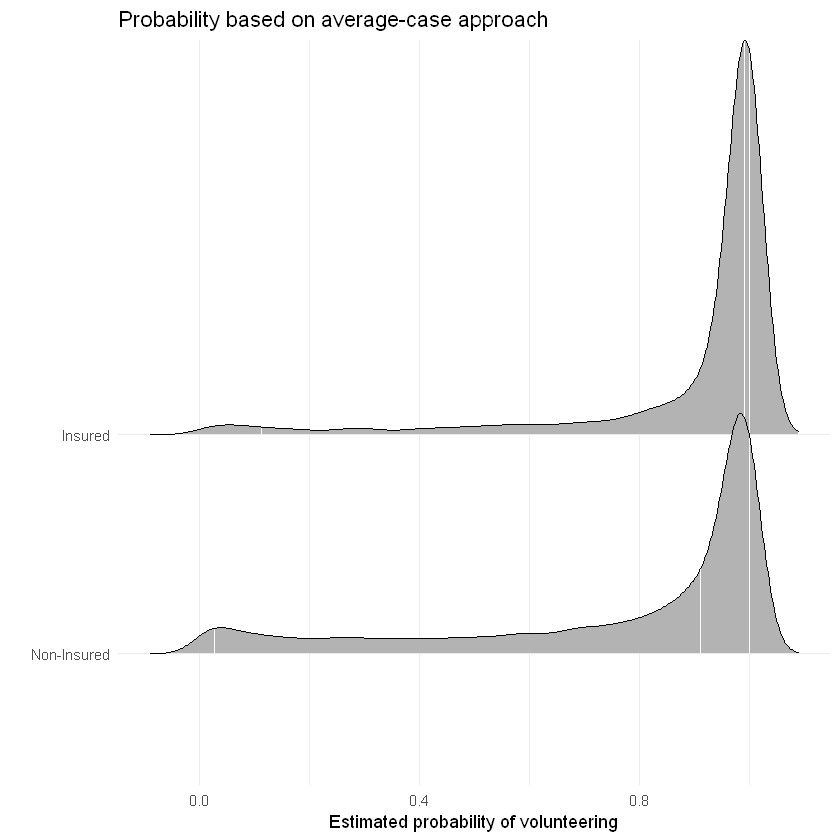

In [76]:
library("ggplot2")
library("ggridges")
ggplot(data = aveprob.Insured.stan, 
       aes(y = factor(x), x = pp)) + 
  stat_density_ridges(quantile_lines = TRUE, 
                quantiles = c(0.025, 0.5, 0.975), vline_color = "white") + 
  scale_y_discrete(labels = c("Non-Insured", "Insured")) + 
  ylab("") + 
  xlab("Estimated probability of volunteering") + 
  labs(title = "Probability based on average-case approach") +
  theme_minimal()

In [28]:
colnames(df)

[1] "Gender"             "Age"                "Driving_License"   
[4] "Previously_Insured" "Vehicle_Age"        "Vehicle_Damage"    
[7] "Annual_Premium"     "Vintage"            "Response"

In [53]:
aveprob.Vehicle_Age.stan <- mcmcAveProb(modelmatrix = mm,
            mcmcout = matrix_stan[, 1:ncol(mm)],
            xcol = 5,
            xrange = seq(min(df$Vehicle_Age), max(df$Vehicle_Age), length.out = 20),
            link = "logit",
            ci = c(0.025, 0.975),
            fullsims = FALSE)

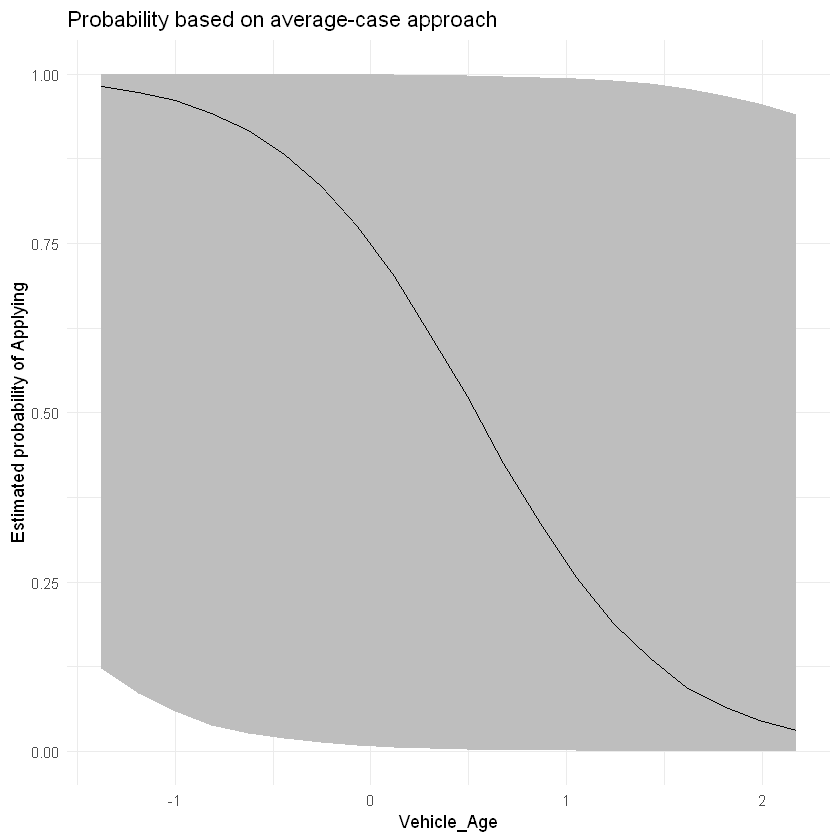

In [54]:
ggplot(data = aveprob.Vehicle_Age.stan, 
       aes(x = x, y = median_pp)) + 
  geom_ribbon(aes(ymin = lower_pp, ymax = upper_pp), fill = "gray") + 
  geom_line() + 
  xlab("Vehicle_Age") + 
  ylab("Estimated probability of Applying") + 
  ylim(0, 1) + 
  labs(title = "Probability based on average-case approach") +
  theme_minimal()

In [56]:
fdsum.stan <- mcmcFD(modelmatrix = mm,
                  mcmcout = matrix_stan[, 1:ncol(mm)],
                  link = "logit",
                  ci = c(0.025, 0.975),
                  fullsims = FALSE)
summary(fdsum.stan)

   median_fd             lower_fd             upper_fd         
 Min.   :-0.5687908   Min.   :-0.8750268   Min.   :-0.0100550  
 1st Qu.:-0.0506125   1st Qu.:-0.2427741   1st Qu.:-0.0002056  
 Median :-0.0004644   Median :-0.0307555   Median : 0.0028532  
 Mean   :-0.0538745   Mean   :-0.1998843   Mean   : 0.1102380  
 3rd Qu.: 0.0238401   3rd Qu.: 0.0001256   3rd Qu.: 0.1072720  
 Max.   : 0.1934150   Max.   : 0.0013045   Max.   : 0.5264432  
   VarName              VarID     
 Length:8           Min.   :1.00  
 Class :character   1st Qu.:2.75  
 Mode  :character   Median :4.50  
                    Mean   :4.50  
                    3rd Qu.:6.25  
                    Max.   :8.00  

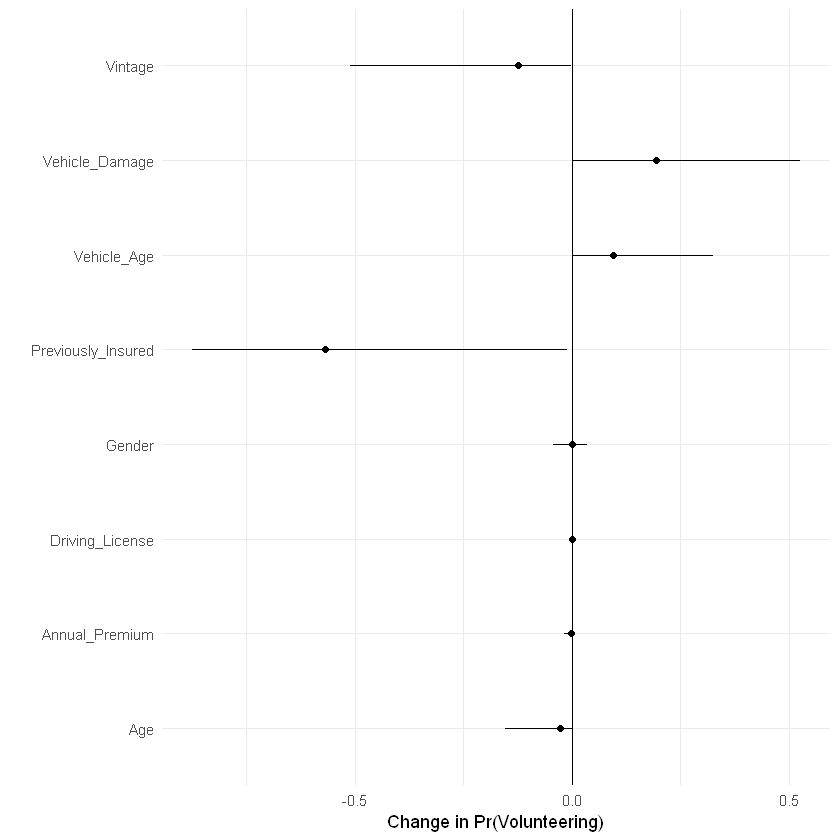

In [57]:
ggplot(data = fdsum.stan, 
       aes(x = median_fd, y = VarName)) + 
  geom_point() + 
  geom_segment(aes(x = lower_fd, xend = upper_fd, yend = VarName)) + 
  geom_vline(xintercept = 0) + 
  xlab("Change in Pr(Volunteering)") + 
  ylab("") +
  theme_minimal()

In [61]:
fitstats <- mcmcRocPrc(object = stan_model,
                       data=dfCombined,
                       yname  = "Response",
                       xnames = c('Gender','Age','Driving_License','Previously_Insured','Vehicle_Age',
                                  'Vehicle_Damage','Annual_Premium','Vintage'),
                       curves = TRUE,
                       fullsims = FALSE)

In [62]:
fitstats$area_under_roc

V1 
0.8304215

In [63]:
fitstats$area_under_prc

V1 
0.7601086

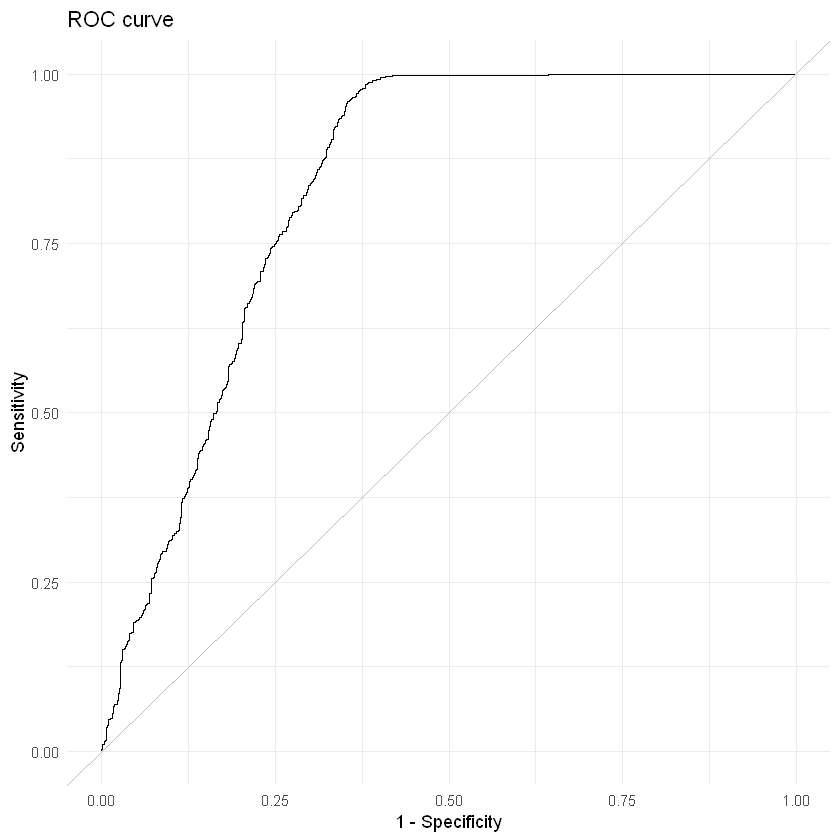

In [64]:
ggplot(data = as.data.frame(fitstats, what = "roc"), aes(x = x, y = y)) +
  geom_line() + 
  geom_abline(intercept = 0, slope = 1, color = "gray") + 
  labs(title = "ROC curve") + 
  xlab("1 - Specificity") + 
  ylab("Sensitivity") +
  theme_minimal()

Warning message:
"Removed 1 row(s) containing missing values (geom_path)."


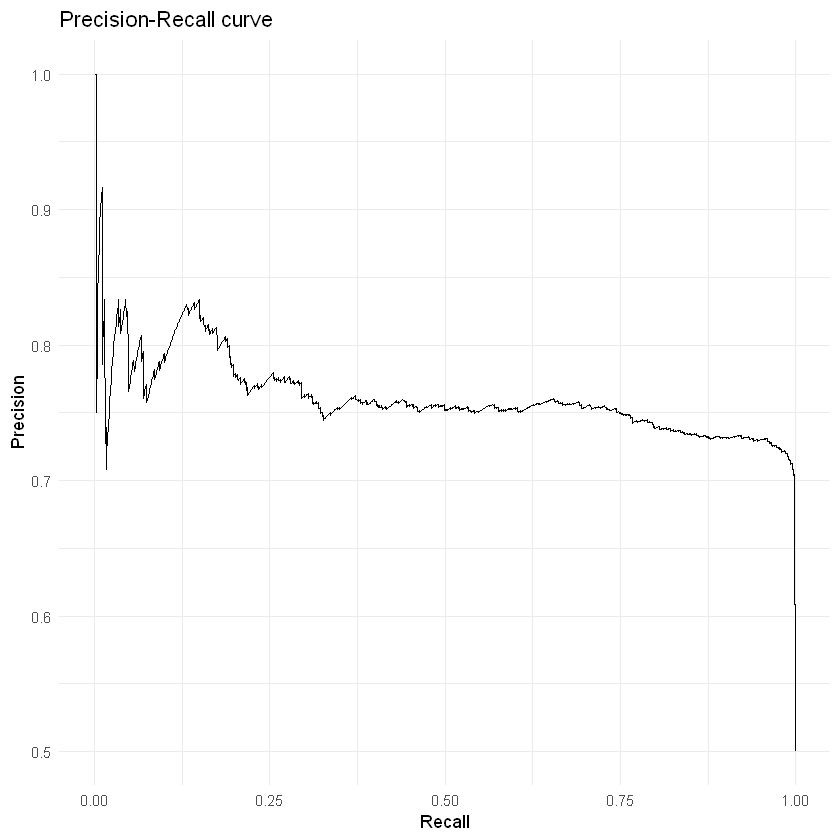

In [65]:
ggplot(data = as.data.frame(fitstats, what = "prc"), aes(x = x, y = y)) +
  geom_line() + 
  labs(title = "Precision-Recall curve") + 
  xlab("Recall") + 
  ylab("Precision") +
  theme_minimal()

In [70]:
fitstats.fullsims <- mcmcRocPrc(object = stan_model,
                        data = dfCombined,
                        yname  = "Response",
                        xnames = c('Gender','Age','Driving_License','Previously_Insured','Vehicle_Age',
                                  'Vehicle_Damage','Annual_Premium','Vintage'),
                        curves = FALSE,
                        fullsims = TRUE)

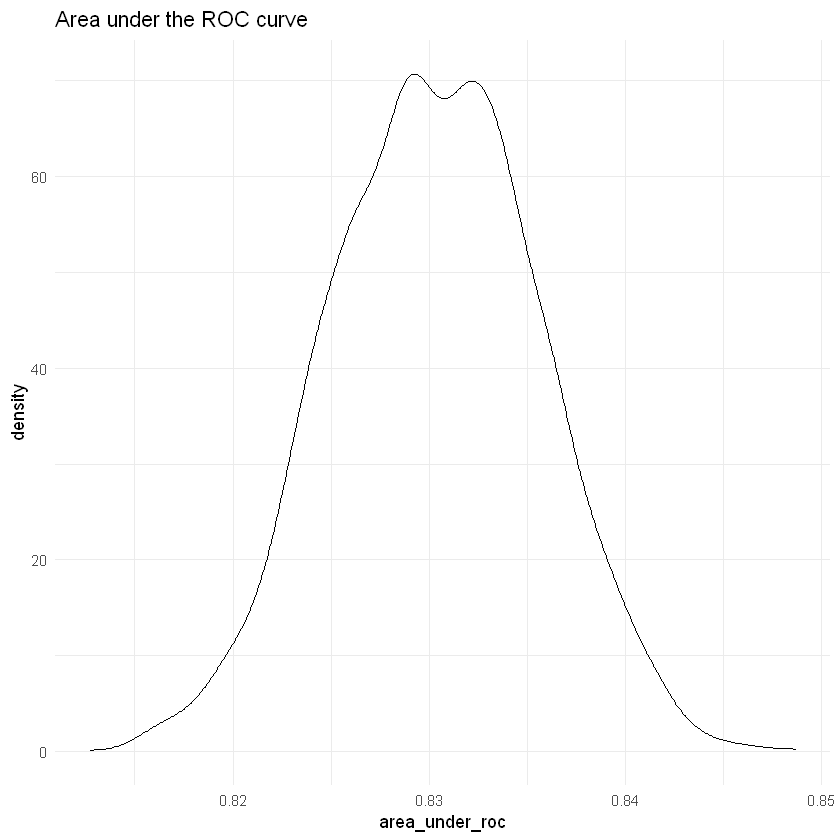

In [71]:
ggplot(as.data.frame(fitstats.fullsims), 
       aes(x = area_under_roc)) +
  geom_density() +
  labs(title = "Area under the ROC curve") +
  theme_minimal()

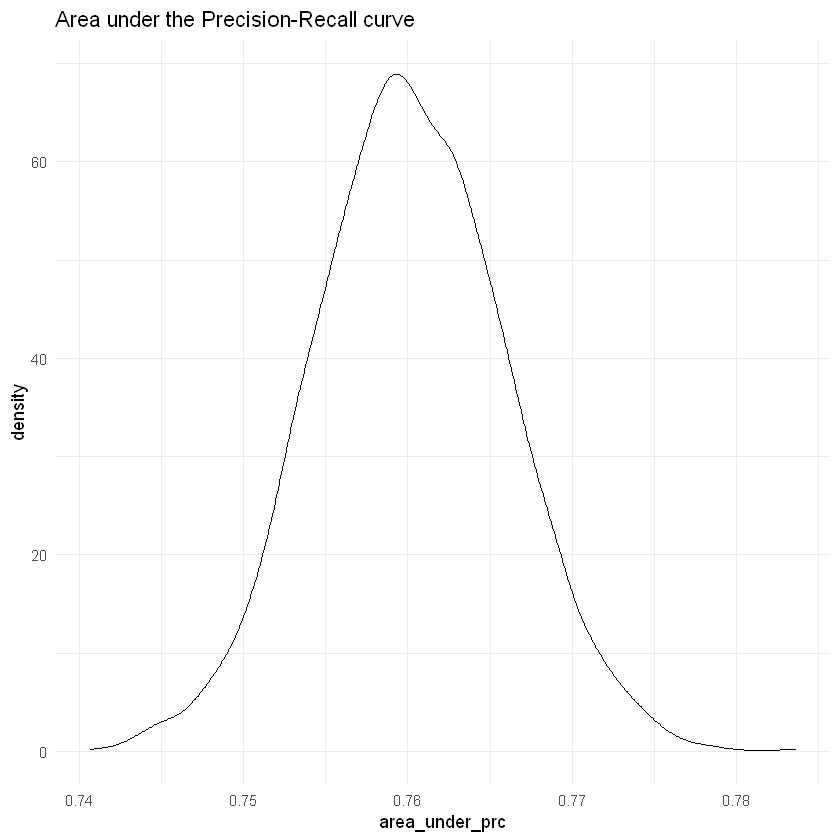

In [72]:
ggplot(as.data.frame(fitstats.fullsims), 
       aes(x = area_under_prc)) +
  geom_density() +
  labs(title = "Area under the Precision-Recall curve") +
  theme_minimal()